In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [32]:
data = pd.read_csv("Churn_Modelling.csv")

In [33]:
X = data.iloc[:, 3:13]
y = data.iloc[:, 13]


In [34]:
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [35]:

X=pd.concat([X,geography,gender],axis=1)

In [36]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [40]:
#initializing 
classifier = Sequential()

In [44]:
#adding input and first hidden  
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11 ))

In [45]:
#adding the 2nd hidden layer 
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

In [48]:

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [50]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [55]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.4844 - accuracy: 0.7931 - val_loss: 0.4605 - val_accuracy: 0.7974
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4446 - accuracy: 0.8007 - val_loss: 0.4481 - val_accuracy: 0.8023
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4360 - accuracy: 0.8054 - val_loss: 0.4416 - val_accuracy: 0.8058
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4303 - accuracy: 0.8100 - val_loss: 0.4370 - val_accuracy: 0.8092
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4257 - accuracy: 0.8151 - val_loss: 0.4324 - val_accuracy: 0.8069
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4214 - accuracy: 0.8190 - val_loss: 0.4280 - val_accuracy: 0.8152
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4177 - accuracy: 0.8231 - val_loss: 0.4243 - val_accuracy: 0.8186

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


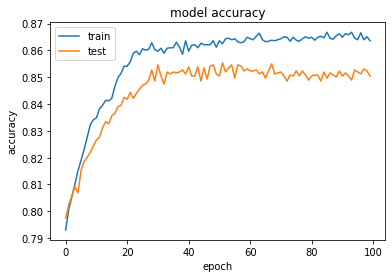

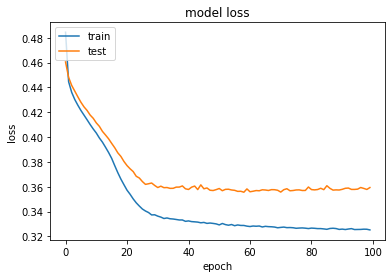

In [57]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

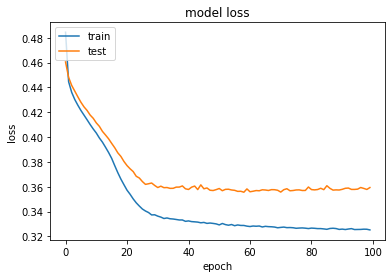

In [58]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [60]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [61]:

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [62]:
print(score)

0.85
